In [1]:
import numpy as np
import tensorflow as tf
import PIL.Image as Image
import tensorflow_hub as hub
import matplotlib.pylab as plt

from tensorflow.keras import layers

In [2]:
classifier_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" 

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape = IMAGE_SHAPE + (3,))
])

65536/61306 [================================] - 0s 1us/step


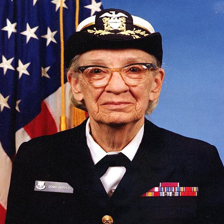

In [4]:
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

In [5]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [6]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node sequential/keras_layer/StatefulPartitionedCall/StatefulPartitionedCall/StatefulPartitionedCall/predict/MobilenetV2/Conv/Conv2D}}]] [Op:__inference_distributed_function_9064]

Function call stack:
distributed_function


In [ ]:
# Predict

predicted_class = np.argmax(result[0], axis = -1)
predicted_class

In [ ]:
# Decode

labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [ ]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())